# TensorFlow 2.x - Multiclass Classification


## Dataset

IRIS dataset is used in this kernel to demonstrate the multiclass classification using `TensorFlow 2.x`. This dataset has 5 features, out of which 4 features are numeric features and 1 is a categorical feature. 

## 1. Import dependent libraries

In [92]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [3]:
# Data file path
FILE_PATH = '/kaggle/input/iris-flower-dataset/IRIS.csv'

# Dataframe from csv file
iris_data = pd.read_csv(FILE_PATH, header=0)

In [4]:
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## 2. Preparing dataset

In [78]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [135]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [145]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y_label, test_size=0.15)

# Validation set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [146]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


In [173]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [174]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_59 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_60 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [175]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [176]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 0s 44ms/step - loss: 1.0422 - accuracy: 0.4857 - val_loss: 0.8049 - val_accuracy: 0.6444
Epoch 2/30
4/4 [==============================] - 0s 16ms/step - loss: 0.6904 - accuracy: 0.6952 - val_loss: 0.6565 - val_accuracy: 0.6222
Epoch 3/30
4/4 [==============================] - 0s 15ms/step - loss: 0.5119 - accuracy: 0.7143 - val_loss: 0.4218 - val_accuracy: 0.9556
Epoch 4/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3930 - accuracy: 0.8000 - val_loss: 0.3668 - val_accuracy: 0.8667
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3214 - accuracy: 0.8857 - val_loss: 0.2851 - val_accuracy: 0.9333
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 0.2755 - accuracy: 0.8857 - val_loss: 0.2438 - val_accuracy: 0.9333
Epoch 7/30
4/4 [==============================] - 0s 17ms/step - loss: 0.2300 - accuracy: 0.8857 - val_loss: 0.2661 - val_accuracy: 0.8667
Epoch 8/30
4/4 [===========

In [177]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9556


[0.06826890259981155, 0.9555555582046509]

## Performance Monitor

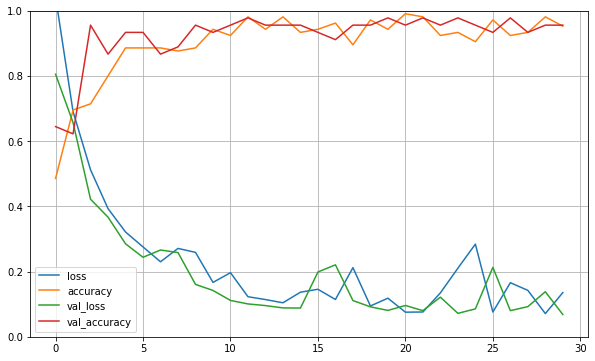

In [178]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [179]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

Actual data : [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
1
2
0
